<a href="https://colab.research.google.com/github/gustavmaskowitz/jupyter-notebooks/blob/master/fruits_360_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model evaluation using Sidekick

Use the Deployment API of the Peltarion platform via Sidekick to get predictions on samples and evaluate the performance of the deployed model in more detail.

Note: This notebook requires installation of Sidekick. For more information about this package, see:
https://github.com/Peltarion/sidekick

In [0]:
#Get sidekick
!pip install git+https://github.com/Peltarion/sidekick#egg=sidekick

In [0]:
from IPython.display import display, Image
import os
import sidekick
import resource
import itertools
import pandas as pd
from glob import glob
from PIL import Image

## Setup

Get the dataset from https://github.com/Horea94/Fruit-Images-Dataset.git

In [0]:
!git clone https://github.com/Horea94/Fruit-Images-Dataset.git

### Paths

In [0]:
#preprocessed dataset
dataset_path = 'Fruit-Images-Dataset/Training'
os.chdir(dataset_path)

### Client to deployment

In [0]:
client = sidekick.Deployment(
    # Enter URL and token
    url='https://a.peltarion.com/deployment/4b33d959-7a63-4cb7-b497-83c9a66b953e/forward',
    token='<REDACTED>',
    dtypes_in={'image': 'Image (100x100x3)'},
    dtypes_out={'class': 'Categorical (103)'}
)

### Helper functions

In [0]:
def get_max_score(pred):
    max_key = 'None'
    max_score = 0
    dict = pred['class'].items()
    for key,score in dict:
        if score >= max_score:        
            max_key = key
            max_score = score
    return (max_key, max_score)

In [0]:
def get_image(path):
    im = Image.open(path)
    new_im = im
    new_im.format = 'jpeg'
    im.close()
    return new_im

## Create test dataframe - ground truth

In [17]:
images_rel_path = glob(os.path.join('*', '*.jpg')) + glob(os.path.join('*', '*.png'))
print("Images found: ", len(images_rel_path))

Images found:  53177


In [18]:
df = pd.DataFrame({'image': images_rel_path})
df['class'] = df['image'].apply(lambda path: os.path.basename(os.path.dirname(path)))
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,image,class
0,Banana/248_100.jpg,Banana
1,Granadilla/235_100.jpg,Granadilla
2,Pitahaya Red/r_61_100.jpg,Pitahaya Red
3,Physalis with Husk/247_100.jpg,Physalis with Husk
4,Pomegranate/r_208_100.jpg,Pomegranate


## Single  predictions

In [0]:
im_path_list = iter(list(df['image']))

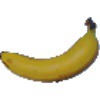

('Banana', 0.9964059)


In [20]:
im_path = next(im_path_list)
im = Image.open(im_path)
display(im)
pred = client.predict(image=im)
print(get_max_score(pred))

## Multiple predictions

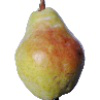

Ground truth: Pear Williams
Prediction: Pear Williams


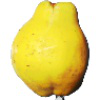

Ground truth: Quince
Prediction: Quince


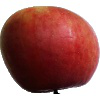

Ground truth: Apple Crimson Snow
Prediction: Apple Crimson Snow


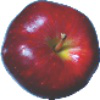

Ground truth: Apple Red Delicious
Prediction: Apple Red Delicious


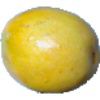

Ground truth: Maracuja
Prediction: Maracuja


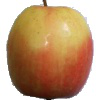

Ground truth: Apple Pink Lady
Prediction: Apple Pink Lady


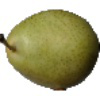

Ground truth: Pear
Prediction: Pear


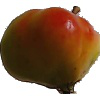

Ground truth: Apple Red Yellow 2
Prediction: Apple Red Yellow 2


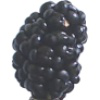

Ground truth: Mulberry
Prediction: Mulberry


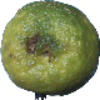

Ground truth: Limes
Prediction: Limes


In [21]:
rows = df.sample(n=10)
for i, row in rows.iterrows():
    im = Image.open(row['image'])    
    display(im)
    pred = client.predict(image=im)
    print('Ground truth: {}\nPrediction: {}'.format(row['class'], get_max_score(pred)[0]))